# 6. 사이킷런으로 수행하는 타이타닉 생존자 예측

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("./titanic_train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
# 데이터 칼럼 타입 확인

print("### 학습 데이터 정보 ###")
print(titanic_df.info())

### 학습 데이터 정보 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [11]:
# Null 값 처리 - fillna()

titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print("데이터 셋 Null값 개수 ",titanic_df.isnull().sum().sum())

데이터 셋 Null값 개수  0


In [12]:
# 문자열 피처들의 값 분류 살펴보기

print("Sex 값 분포: \n", titanic_df['Sex'].value_counts())
print("\nCabin 값 분포:\n", titanic_df['Cabin'].value_counts())
print("\nEmbarked 값 분포:\n",titanic_df['Embarked'].value_counts())

Sex 값 분포: 
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포:
 N              687
C23 C25 C27      4
B96 B98          4
G6               4
C22 C26          3
E101             3
F33              3
F2               3
D                3
B77              2
B35              2
E121             2
F4               2
D35              2
C125             2
E33              2
C126             2
C83              2
D26              2
C124             2
E67              2
E25              2
B51 B53 B55      2
C52              2
D17              2
B22              2
C123             2
F G73            2
D20              2
E8               2
              ... 
A14              1
A36              1
C32              1
C87              1
E58              1
D21              1
B78              1
E10              1
A20              1
C90              1
B86              1
C47              1
D48              1
E36              1
C91              1
A6               1
C82              1
B101      

In [13]:
# Cabin 속성에서 앞 글자만 추출하기

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].value_counts())

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


#### 머신러닝 알고리즘을 적용해 예측을 수행하기 전 데이터 탐색
## 성별에 따른 생존자 수

In [14]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


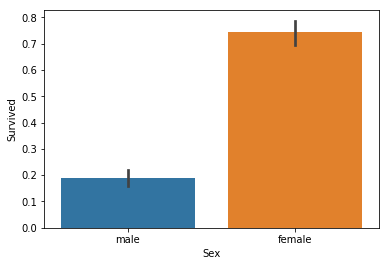

In [15]:
# 시각화
sns.barplot(x='Sex',y='Survived',data=titanic_df)

## 부에 따른 생존확률
객실 등급별 성별에 따른 생존자 수

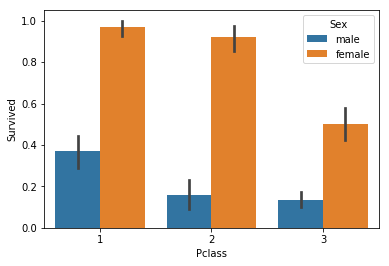

In [16]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

## 나이에 따른 생존확률

In [ ]:
# 입력 Age에 따라 구분 값을 반환하는 함수 
# DataFrame의 apply lambda식에 사용
def get_category(age):
    cat=''
    if age<=-1: cat='Unknown'
    elif age<=5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=18: cat='Teenager'
    elif age<=25: cat='Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else: cat='Elderly'
        
    return cat

